In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.linear_model as lm

import statsmodels.api as sm

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches

from time import time

In [3]:
style = "<style>svg{width: 50% !important; height: 40% !important;} </style>"
HTML(style)

# Titanic Dataset

In [6]:
training_data = pd.read_csv(r'D:\JupyterProjects\datasets\titanic_set\train.csv')
test_data = pd.read_csv(r'D:\JupyterProjects\datasets\titanic_set\test.csv')
submission_data = pd.read_csv(r'D:\JupyterProjects\datasets\titanic_set\gender_submission.csv')

In [7]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Анализ данных, мы проверяем нет ли NaN

In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
count_Embarked = training_data.groupby('Embarked', as_index=False).aggregate({'PassengerId': 'count'}) \
    .rename(columns={'PassengerId': 'Count'})

In [13]:
count_Embarked

,Embarked,Count
0,C,168
1,Q,77
2,S,644


<BarContainer object of 3 artists>

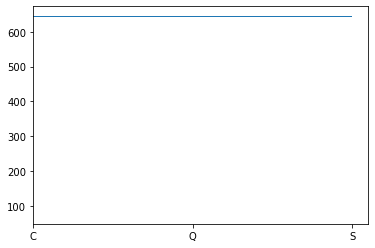

In [14]:
plt.barh(count_Embarked.Countcount_Embarked.Embarked, )

### Так как S - мода, то NaN vulex will be filled na it

<AxesSubplot:>

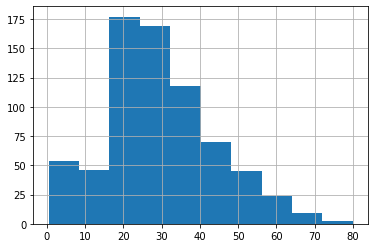

In [14]:
training_data.Age.hist()

<AxesSubplot:>

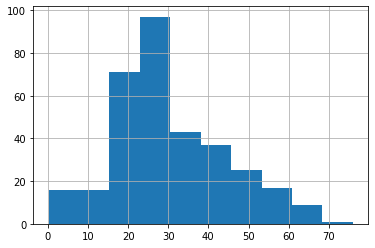

In [15]:
test_data.Age.hist()

### Медианное значение для nan features

In [16]:
training_data.Age.median()

28.0

In [17]:
test_data.Age.median()

27.0

In [18]:
median_average_value = (training_data.Age.median() + test_data.Age.median())/2

### Тюнинг данных

In [19]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
X_training_data = training_data[['Pclass', 'Sex', 'Age', 'Embarked']]
X_test_data = test_data[['Pclass', 'Sex', 'Age', 'Embarked']]

fill_value = {'Age': median_average_value,
              'Embarked': training_data.Embarked.mode().item()}
X_training_data = X_training_data.fillna(fill_value)
X_test_data = X_test_data.fillna(fill_value)

X_training_data = pd.get_dummies(X_training_data)
X_test_data = pd.get_dummies(X_test_data)

X_training_data['Pclass_first'] = np.where(X_training_data.Pclass == 1, 1, 0)
X_training_data['Pclass_second'] = np.where(X_training_data.Pclass == 2, 1, 0)
X_training_data['Pclass_third'] = np.where(X_training_data.Pclass == 3, 1, 0)
X_test_data['Pclass_first'] = np.where(X_test_data.Pclass == 1, 1, 0)
X_test_data['Pclass_second'] = np.where(X_test_data.Pclass == 2, 1, 0)
X_test_data['Pclass_third'] = np.where(X_test_data.Pclass == 3, 1, 0)

X_training_data = X_training_data.drop(['Sex_male', 'Pclass'], axis=1)
X_test_data = X_test_data.drop(['Sex_male', 'Pclass'], axis=1)

y_training = training_data.Survived
y_test = submission_data.Survived

In [21]:
X_training_data.head()

,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_first,Pclass_second,Pclass_third
0,22.0,0,0,0,1,0,0,1
1,38.0,1,1,0,0,1,0,0
2,26.0,1,0,0,1,0,0,1
3,35.0,1,0,0,1,1,0,0
4,35.0,0,0,0,1,0,0,1


In [22]:
X_test_data.head()

,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_first,Pclass_second,Pclass_third
0,34.5,0,0,1,0,0,0,1
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,0,1,0
3,27.0,0,0,0,1,0,0,1
4,22.0,1,0,0,1,0,0,1


## Выбор модели

## эффективный способ

In [23]:
clf = tree.DecisionTreeClassifier()
param = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 31),
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [8, 9, 10, 11, 12]}

best_clf = GridSearchCV(clf, param, cv=KFold(n_splits=5,
                                             shuffle=True,
                                             random_state=42))     
best_clf.fit(X_training_data, y_training)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'min_samples_leaf': [8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4]})

In [24]:
best_clf = best_clf.best_estimator_
best_clf.fit(X_training_data, y_training)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [25]:
y_pred = best_clf.predict(X_test_data)

In [26]:
cross_val_score(best_clf, X_training_data, y_training, cv=10)

array([0.82222222, 0.7752809 , 0.79775281, 0.87640449, 0.84269663,
       0.79775281, 0.80898876, 0.7752809 , 0.83146067, 0.80898876])

C:\Users\79127\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

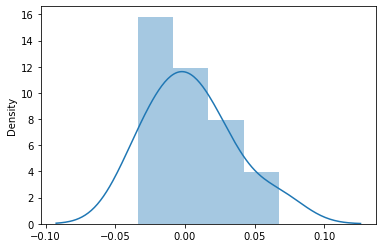

In [27]:
cross_arr = cross_val_score(best_clf, X_training_data, y_training, cv=10)
cross_arr = cross_arr - np.median(cross_arr)
cross_arr.sort()
sns.distplot(cross_arr)

In [28]:
precision_score(y_test, y_pred, average='macro')

0.8698969177383139

In [29]:
recall_score(y_test, y_pred, average='macro')

0.8585526315789473

In [30]:
f1_score(y_test, y_pred, average='macro')

0.863594146145543

In [31]:
y_pred_proba_titanic = best_clf.predict_proba(X_test_data)
metrics_frame = pd.DataFrame()

for i in np.arange(0.05, 1, 0.025):
    
    y_pred_current = np.where(y_pred_proba_titanic[:, 1]>i, 1, 0)
    
    current_precision = precision_score(y_test, y_pred_current, average='macro')
    current_recall = recall_score(y_test, y_pred_current, average='macro')
    current_f1_score = f1_score(y_test, y_pred_current, average='macro')
    
    current_data = pd.DataFrame({'value': i,
                                 'precision': [current_precision],
                                 'recall': [current_recall],
                                 'f1_score': [current_f1_score]})
    
    metrics_frame = metrics_frame.append(current_data)

In [32]:
metrics_frame.head()

,value,precision,recall,f1_score
0,0.050,0.690000,0.533835,0.338743
0,0.075,0.691919,0.541353,0.353761
0,0.100,0.777597,0.779135,0.722482
0,0.125,0.760784,0.776316,0.735656
0,0.150,0.760784,0.776316,0.735656


In [33]:
metrics_frame_long = pd.melt(metrics_frame, 
                           id_vars=['value'], 
                           value_vars=['precision', 'recall', 'f1_score'],
                           var_name='set_type',
                           value_name='score')

Text(0.5, 1.0, 'PRECISION&RECALL')

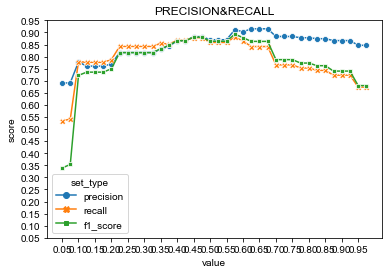

In [34]:
sns.lineplot(x='value', 
             y='score', 
             hue='set_type', 
             style='set_type',
             data=metrics_frame_long, 
             markers=True,
             dashes=False)
plt.xticks(np.arange(0.05, 1, 0.05))
plt.yticks(np.arange(0.05, 1, 0.05))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('PRECISION&RECALL')

## неэффективный способ

In [221]:
scores_data_titanic = pd.DataFrame()
clf = tree.DecisionTreeClassifier()

for current_min_samples_split in [2, 5, 10, 15, 20]:
    for current_min_samples_leaf in [1, 5, 10, 15, 20]:
        
        param = {'criterion': ['gini', 'entropy'],
                 'max_depth': range(1, 31),
                 'min_samples_split': [current_min_samples_split],
                 'min_samples_leaf': [current_min_samples_leaf]}
        current_clf = GridSearchCV(clf, param, cv=5)     
        current_clf.fit(X_training_data, y_training)
        
        current_y_pred = current_clf.predict(X_test_data)
        
        cross_val_score_train = cross_val_score(current_clf,
                                                X_training_data,
                                                y_training,
                                                cv=KFold(n_splits=5,
                                                         shuffle=True,
                                                         random_state=42)).mean()
        
        current_precision = precision_score(y_test, current_y_pred, average='macro')
        current_recall = recall_score(y_test, current_y_pred, average='macro')
        current_f1_score = f1_score(y_test, current_y_pred, average='macro')
        
        temp_score_data_titanic = pd.DataFrame({
                                    'max_depth': [current_clf.best_estimator_.max_depth],
                                    'criterion': [current_clf.best_estimator_.criterion],
                                    'min_samples_split': [current_min_samples_split],
                                    'min_samples_leaf': [current_min_samples_leaf],
                                    'cross_val_score_train': [cross_val_score_train],
                                    'precision': [current_precision],
                                    'recall': [current_recall],
                                    'f1_score': [current_f1_score]})
        
        scores_data_titanic = scores_data_titanic.append(temp_score_data_titanic)

## for max_depth sns

In [222]:
scores_data_titanic_long_max_depth = pd.melt(scores_data_titanic, 
                                             id_vars=['max_depth'], 
                                             value_vars=['cross_val_score_train', 
                                                         'cross_val_score_test',
                                                         'precision',
                                                         'recall',
                                                         'f1_score'],
                                             var_name='set_type',
                                             value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

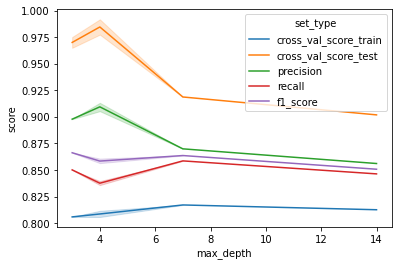

In [223]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_titanic_long_max_depth)

## for min_samples_split sns

In [224]:
scores_data_titanic_long_min_samples_split = pd.melt(scores_data_titanic, 
                                             id_vars=['min_samples_split'], 
                                             value_vars=['cross_val_score_train', 
                                                         'cross_val_score_test',
                                                         'precision',
                                                         'recall',
                                                         'f1_score'],
                                             var_name='set_type',
                                             value_name='score')

<AxesSubplot:xlabel='min_samples_split', ylabel='score'>

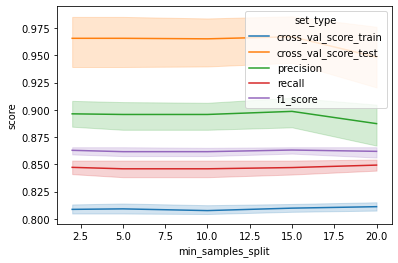

In [225]:
sns.lineplot(x='min_samples_split', y='score', hue='set_type', data=scores_data_titanic_long_min_samples_split)

## for min_samples_leaf sns

In [226]:
scores_data_titanic_long_min_samples_leaf = pd.melt(scores_data_titanic, 
                                             id_vars=['min_samples_leaf'], 
                                             value_vars=['cross_val_score_train', 
                                                         'cross_val_score_test',
                                                         'precision',
                                                         'recall',
                                                         'f1_score'],
                                             var_name='set_type',
                                             value_name='score')

<AxesSubplot:xlabel='min_samples_leaf', ylabel='score'>

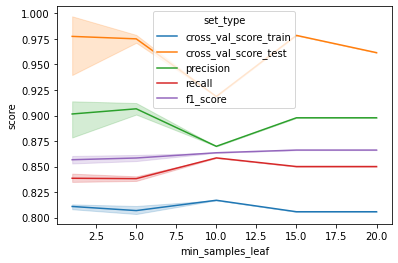

In [227]:
sns.lineplot(x='min_samples_leaf', y='score', hue='set_type', data=scores_data_titanic_long_min_samples_leaf)

In [173]:
scores_data_titanic['model'] = range(1, scores_data_titanic.shape[0] + 1)

In [174]:
scores_data_titanic = scores_data_titanic.set_index('model')

In [171]:
scores_data_titanic['model_param'] = np.nan
for i in scores_data_titanic.index.to_list():
    scores_data_titanic.loc[i, 'model_param'] = [{'max_depth': scores_data_titanic.max_depth[i],
                                       'criterion': scores_data_titanic.criterion[i],
                                       'min_samples_split': scores_data_titanic.min_samples_split[i],
                                       'min_samples_leaf': scores_data_titanic.min_samples_leaf[i]}]

In [177]:
scores_data_titanic = scores_data_titanic.drop(['max_depth', 'criterion', 'min_samples_split', 'min_samples_leaf'], axis=1)

In [179]:
scores_data_titanic = scores_data_titanic[['model_param', 
                                           'cross_val_score_train', 
                                           'cross_val_score_test', 
                                           'precision',
                                           'recall',
                                           'f1_score']]

In [182]:
scores_data_titanic.head()

,model_param,cross_val_score_train,cross_val_score_test,precision,recall,f1_score
model,,,,,,
1,"{'max_depth': 4, 'criterion': 'gini', 'min_sam...",0.813709,0.997619,0.915092,0.841635,0.862944
2,"{'max_depth': 4, 'criterion': 'gini', 'min_sam...",0.803628,0.971256,0.900974,0.835996,0.855467
3,"{'max_depth': 7, 'criterion': 'gini', 'min_sam...",0.817086,0.918703,0.869897,0.858553,0.863594
4,"{'max_depth': 3, 'criterion': 'gini', 'min_sam...",0.805850,0.978485,0.897825,0.850094,0.866231
5,"{'max_depth': 3, 'criterion': 'gini', 'min_sam...",0.805850,0.961589,0.897825,0.850094,0.866231


# Random forest

In [35]:
X_training_data.head()

,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_first,Pclass_second,Pclass_third
0,22.0,0,0,0,1,0,0,1
1,38.0,1,1,0,0,1,0,0
2,26.0,1,0,0,1,0,0,1
3,35.0,1,0,0,1,1,0,0
4,35.0,0,0,0,1,0,0,1


In [36]:
X_test_data.head()

,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_first,Pclass_second,Pclass_third
0,34.5,0,0,1,0,0,0,1
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,0,1,0
3,27.0,0,0,0,1,0,0,1
4,22.0,1,0,0,1,0,0,1


In [37]:
y_training

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [40]:
clf_rf = RandomForestClassifier()
param = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 31),
         'min_samples_split': [2, 5, 10, 15, 20],
         'min_samples_leaf': [1, 5, 10, 15, 20]}

best_clf_rf = GridSearchCV(clf_rf, param, cv=KFold(n_splits=5,
                                                   shuffle=True,
                                                   random_state=42))     
best_clf_rf.fit(X_training_data, y_training)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [43]:
clf_rf.fit(X_training_data, y_training)

RandomForestClassifier()

In [49]:
y_pred = clf_rf.predict(X_test_data)

In [45]:
imp_features_titanic = pd.DataFrame(clf_rf.feature_importances_, index=X_training_data.columns, columns=['importance']) \
    .sort_values('importance', ascending=True)

<AxesSubplot:>

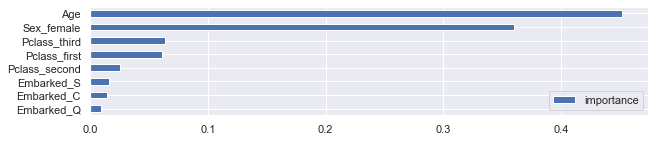

In [46]:
imp_features_titanic.plot(kind='barh', figsize=(10, 2))

# heart desease dataset

In [62]:
data_heart = pd.read_csv('heart_disease.csv')

In [63]:
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
X = data_heart.drop('target', axis=1)
y = data_heart.target

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [66]:
np.random.seed(0)
rf_data_heart = RandomForestClassifier(n_estimators=10, max_depth=5)

In [67]:
rf_data_heart.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [68]:
rf_data_heart.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

In [69]:
imp_features_data_heart = pd.DataFrame(rf_data_heart.feature_importances_, index=X.columns, columns=['importance']) \
    .sort_values('importance', ascending=True)

<AxesSubplot:>

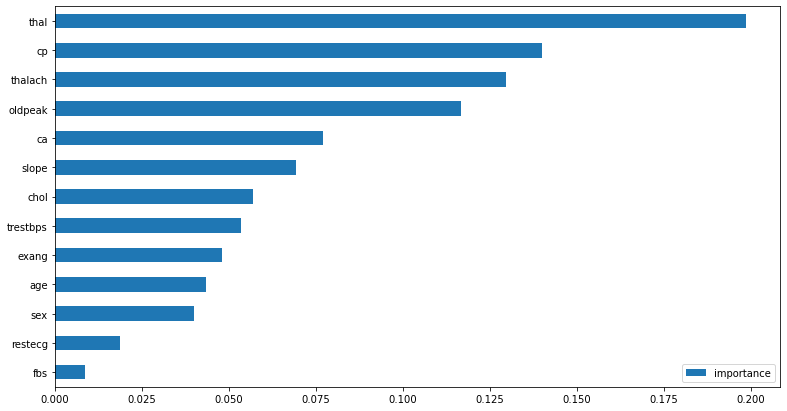

In [70]:
imp_features_data_heart.plot(kind='barh', figsize=(13, 7))

# student_data contest

In [197]:
student_data = pd.read_csv('D:\Загрузки\StudentsPerformance.csv')
student_data = student_data.rename(columns={'parental level of education' : 'parental_level_of_education',
                                             'test preparation course' : 'test_preparation_course',
                                             'math score' : 'math_score',
                                             'reading score' : 'reading_score',
                                             'writing score' : 'writing_score'})

In [198]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [199]:
student_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [200]:
student_data.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [201]:
student_data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [202]:
student_data.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

# ГРИБЫ

In [124]:
mush_data = pd.read_csv('training_mush.csv')
mush_data_test = pd.read_csv('testing_mush.csv')
mush_y_public = pd.read_csv('testing_y_mush.csv')

In [104]:
mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [105]:
X_train_mush = mush_data.drop('class', axis=1)
y_train_mush = mush_data['class']

In [106]:
clf_rf = RandomForestClassifier(random_state=0)
params = {'n_estimators': [i for i in np.arange(10, 50, 10)],
          'max_depth': [i for i in np.arange(1, 12, 2)],
          'min_samples_leaf': [i for i in np.arange(1, 7)],
          'min_samples_split': [i for i in np.arange(2, 9, 2)]}

In [107]:
mush_best_clf_rf = GridSearchCV(estimator=clf_rf,
                                param_grid=params,
                                cv=3,
                                n_jobs=-1)

In [108]:
mush_best_clf_rf.fit(X_train_mush, y_train_mush)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]})

In [109]:
mush_best_clf_rf = mush_best_clf_rf.best_estimator_
mush_best_clf_rf.fit(X_train_mush, y_train_mush)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [110]:
mush_best_clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [111]:
mush_best_clf_rf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [112]:
imp_features_mush = pd.DataFrame(mush_best_clf_rf.feature_importances_,
                                 index=X_train_mush.columns,
                                 columns=['importance']) \
    .sort_values('importance', ascending=True)

<AxesSubplot:>

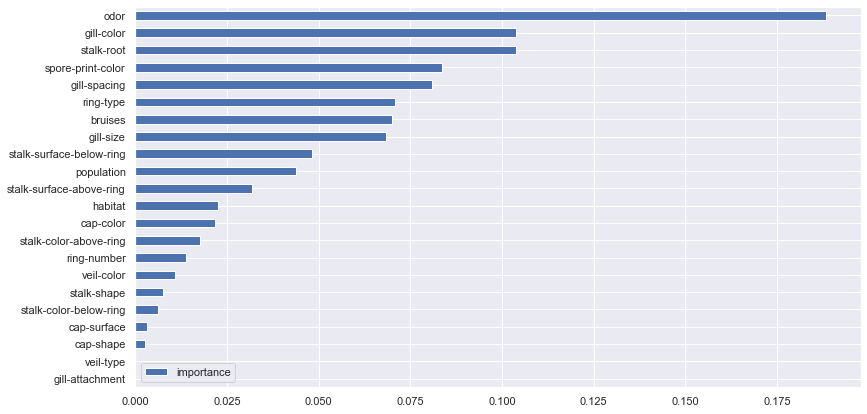

In [113]:
imp_features_mush.plot(kind='barh', figsize=(13, 7))

In [117]:
y_pred_mush = mush_best_clf_rf.predict(mush_data_test)

In [121]:
sum([i for i in y_pred_mush if i == 1])

976

In [129]:
y_test_mush = mush_y_public['class']

In [132]:
confusion_matrix(y_test_mush, y_pred_mush)

array([[1055,    0],
       [   0,  976]], dtype=int64)

## И на Марсе будут яблони цвести

In [157]:
invasion_dataset = pd.read_csv('invasion.csv')
invasion_test_data = pd.read_csv('operative_information.csv')

In [160]:
invasion_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [161]:
invasion_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   g_reflection        1500 non-null   float64
 1   i_reflection        1500 non-null   float64
 2   speed               1500 non-null   float64
 3   brightness          1500 non-null   float64
 4   time_of_observance  1500 non-null   int64  
 5   volume              1500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.4 KB


In [186]:
X_train = invasion_dataset.drop('class', axis=1)
y_train = invasion_dataset['class']
clf_rf = RandomForestClassifier()
params = {'n_estimators': [i for i in np.arange(10, 50, 10)],
          'max_depth': [i for i in np.arange(1, 12, 2)],
          'min_samples_leaf': [i for i in np.arange(1, 7)],
          'min_samples_split': [i for i in np.arange(2, 9, 2)]}
invasion_best_clf_rf = GridSearchCV(estimator=clf_rf,
                                param_grid=params,
                                cv=3,
                                n_jobs=-1)
invasion_best_clf_rf.fit(X_train, y_train)
invasion_best_clf_rf = invasion_best_clf_rf.best_estimator_
invasion_best_clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [187]:
counter = {'transport': 0,
           'fighter': 0,
           'cruiser': 0}
for i in invasion_best_clf_rf.predict(invasion_test_data):
    
    if i == 'transport':
        counter[i] = counter.get(i) + 1
        
    if i == 'fighter':
        counter[i] = counter.get(i) + 1
        
    if i == 'cruiser':
        counter[i] = counter.get(i) + 1

counter

{'transport': 595, 'fighter': 675, 'cruiser': 230}

In [188]:
imp_features_invasion = pd.DataFrame(invasion_best_clf_rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']) \
    .sort_values('importance', ascending=True)

<AxesSubplot:>

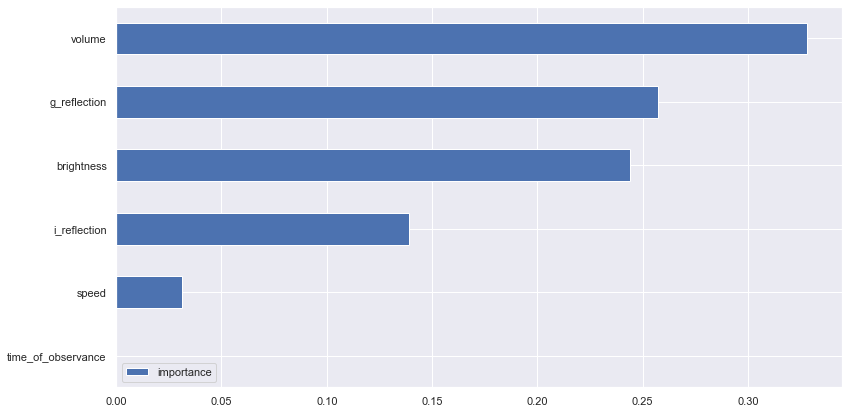

In [189]:
imp_features_invasion.plot(kind='barh', figsize=(13, 7))

# Students performance

In [16]:
student_data = pd.read_csv('D:\JupyterProjects\datasets\dataset_students.csv')
student_data = student_data.rename(columns={'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})

In [17]:
student_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


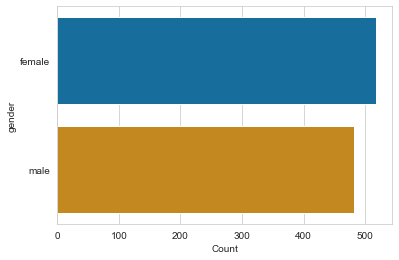

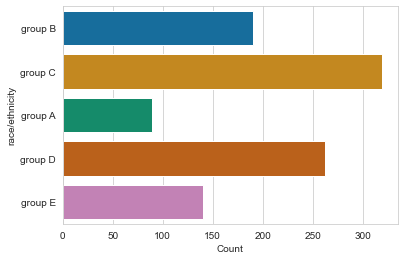

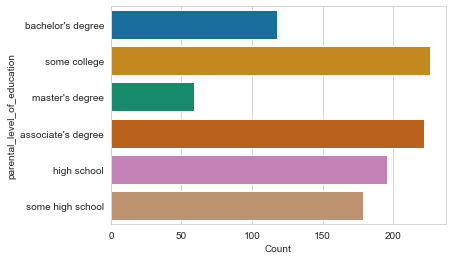

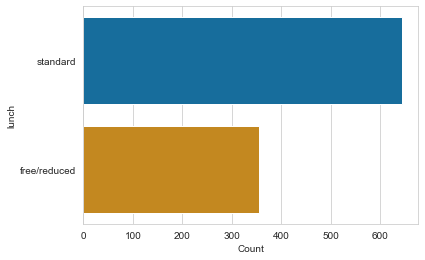

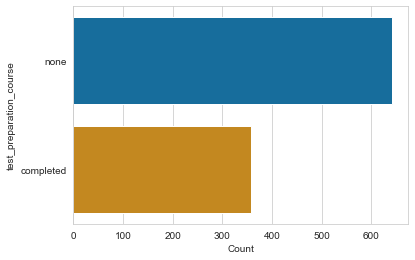

In [29]:
for i in student_data.columns.to_list()[0:5]:
    sns.set_style('whitegrid')
    sns.countplot(y=f'{i}', data=student_data, palette='colorblind')
    plt.xlabel('Count')
    plt.ylabel(f'{i}')
    plt.show()

# WineQualityDataset

In [33]:
df_wine_quality = pd.read_csv('D:\JupyterProjects\datasets\winequality.csv')
df_wine_quality = df_wine_quality.rename(columns={'fixed acidity': 'fixed_acidity',
                                                 'volatile acidity': 'volatile_acidity',
                                                 'citric acid': 'citric_acid',
                                                 'residual sugar': 'residual_sugar',
                                                 'free sulfur dioxide': 'free_sulfur_dioxide',
                                                 'total sulfur dioxide': 'total_sulfur_dioxide',})

In [34]:
df_wine_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_wine_quality.copy().drop('quality', axis=1), 
                                                    df_wine_quality.quality, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [23]:
w = np.array([0] * (df_wine_quality.columns.size - 1))

In [96]:
examples_list = []
for i in X_train.index:
    examples_list.append(X_train.loc[i].to_list())
examples = np.array(examples_list)

In [95]:
def Target(ex):
    return df_wine_quality.loc[(df_wine_quality.fixed_acidity == ex[0]) & \
                               (df_wine_quality.volatile_acidity == ex[1]) & \
                               (df_wine_quality.citric_acid == ex[2]) &
                               (df_wine_quality.residual_sugar == ex[3]) & \
                               (df_wine_quality.chlorides == ex[4]) & \
                               (df_wine_quality.free_sulfur_dioxide == ex[5]) & \
                               (df_wine_quality.total_sulfur_dioxide == ex[6]) & \
                               (df_wine_quality.density == ex[7]) & \
                               (df_wine_quality.pH == ex[8]) & \
                               (df_wine_quality.sulphates == ex[9]) & \
                               (df_wine_quality.alcohol == ex[10])].reset_index().drop('index', axis=1).loc[0].quality.item()

In [94]:
Target(examples[0])

6.0

In [67]:
def Predict(ex):
    return np.dot(w, ex)

In [69]:
Predict(examples[0])

0.0

In [98]:
w

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
perfect = False
while not perfect:
    perfect = True
    for example in examples:
        if Predict(example) != Target(example):
            perfect = False
            if Predict(example) < Target(example):
                w = w + example
            else:
                w = w - example
            break
print('final answer', w)
                